In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_features = pd.read_csv('../data/features.csv')
df_sales = pd.read_csv('../data/sales.csv')
df_stores = pd.read_csv('../data/stores.csv')

In [3]:
df_features['Date'] = pd.to_datetime(df_features['Date'], format='%d/%m/%Y')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d/%m/%Y')


In [4]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [5]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [9]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
df_features = df_features.rename(columns={'IsHoliday': 'IsHolidayFeatures'})
df_combined = pd.merge(df_sales, df_stores, on='Store', how='left')
df_final = pd.merge(df_combined, df_features, on=['Store', 'Date'], how='left')
df_final['week'] = df_final['Date'].dt.isocalendar().week
df_final['month'] = df_final['Date'].dt.month
df_final['day'] = df_final['Date'].dt.day
df_final.set_index('Date', inplace=True)
df_final = df_final.sort_index()


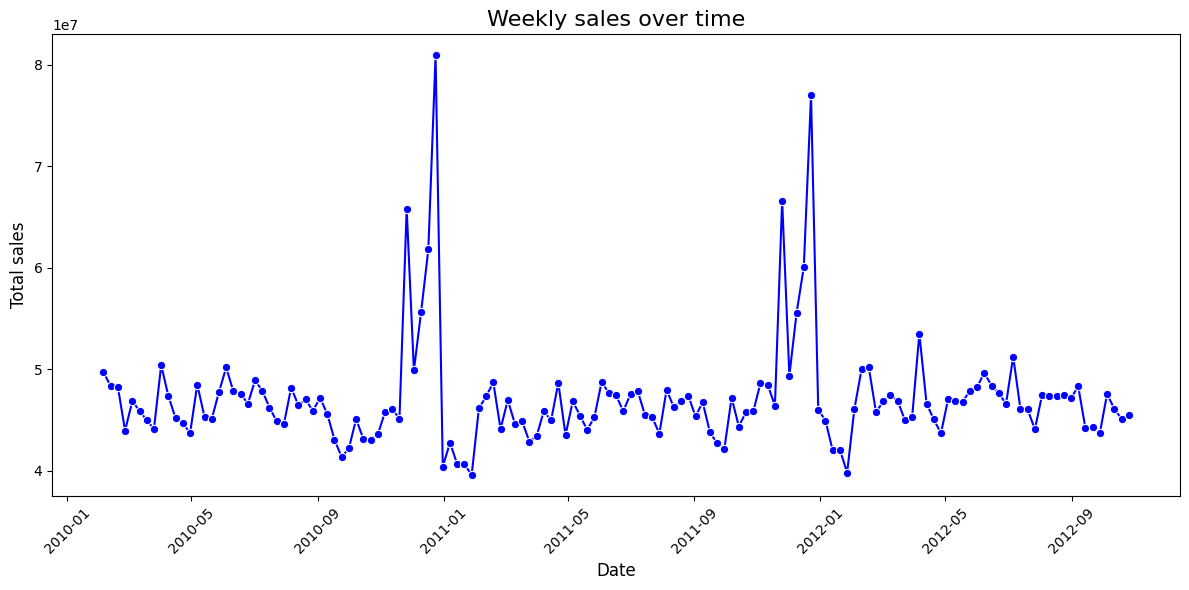

In [11]:

weekly_sales = df_final.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales', marker='o', color='b')
plt.title('Weekly sales over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


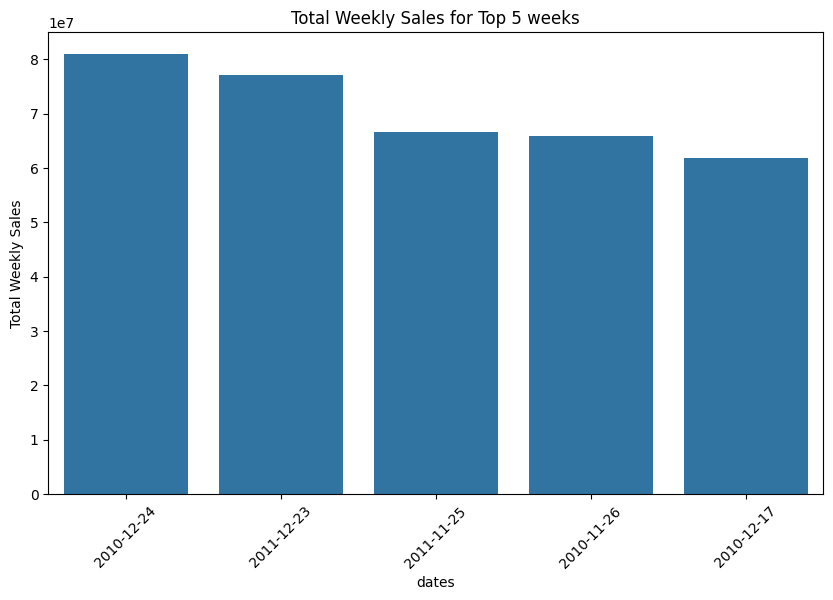

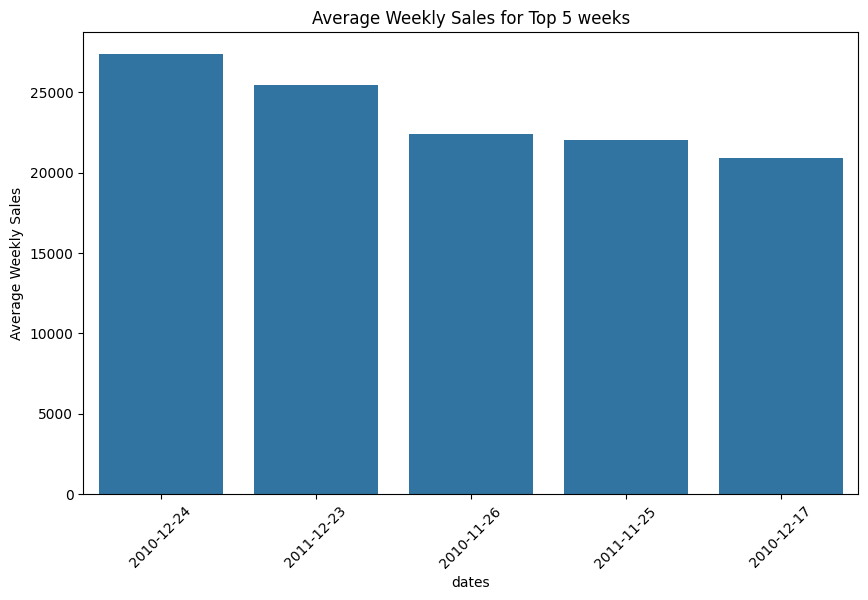

In [25]:
week_sales = df_final.groupby("Date")["Weekly_Sales"].sum()
week_avg_sales = df_final.groupby("Date")["Weekly_Sales"].mean()

top_5_total_sales = week_sales.sort_values(ascending=False).head(5)
top_5_avg_sales = week_avg_sales.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_total_sales.index, y=top_5_total_sales.values)
plt.xlabel("dates")
plt.ylabel("Total Weekly Sales")
plt.title("Total Weekly Sales for Top 5 weeks")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_avg_sales.index, y=top_5_avg_sales.values)
plt.xlabel("dates")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales for Top 5 weeks")
plt.xticks(rotation=45)
plt.show()

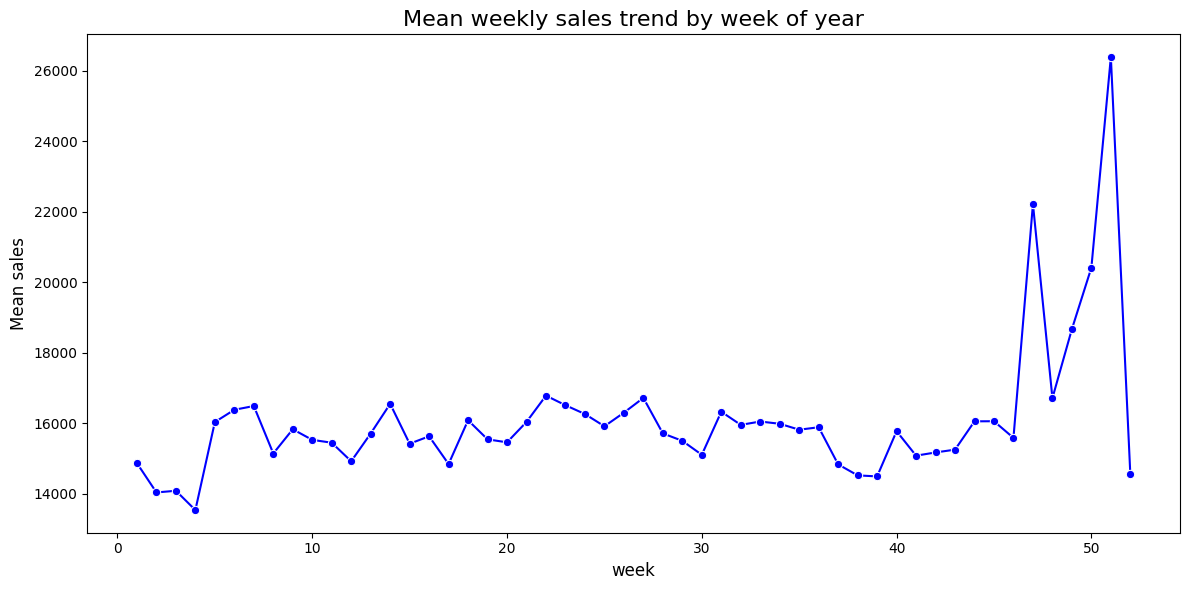

In [12]:
weekly_sales_by_week = df_final.groupby('week')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=weekly_sales_by_week, x='week', y='Weekly_Sales', marker='o', color='b')

plt.title('Mean weekly sales trend by week of year', fontsize=16)
plt.xlabel('week', fontsize=12)
plt.ylabel('Mean sales', fontsize=12)
plt.tight_layout()
plt.show()

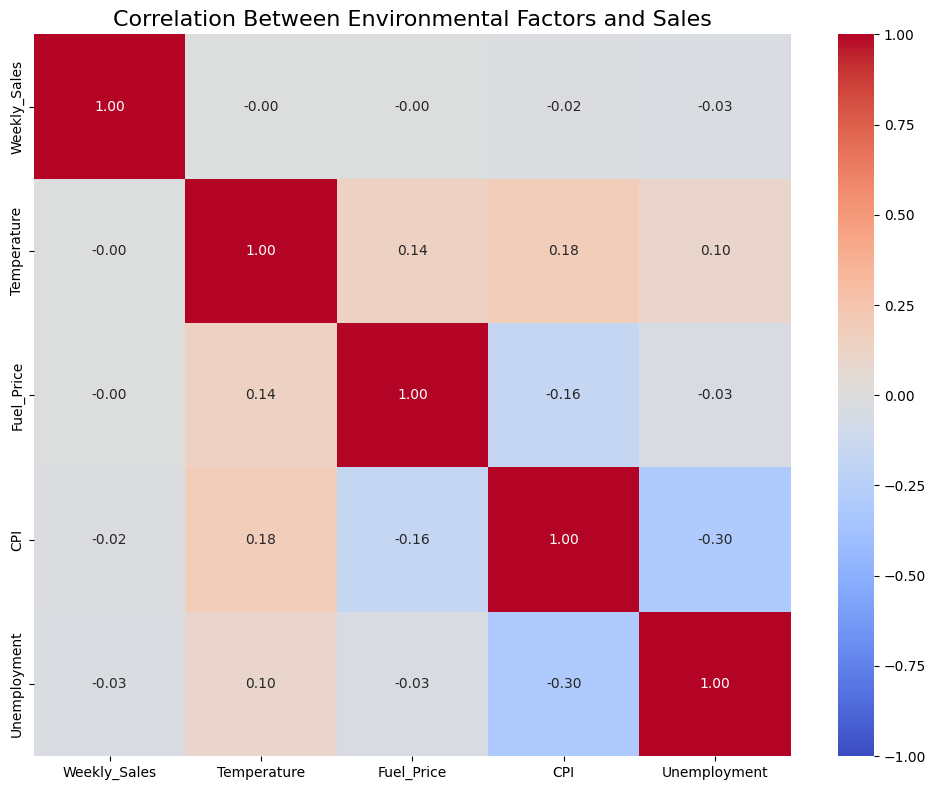

In [13]:
df_corr = df_final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Between Environmental Factors and Sales', fontsize=16)
plt.tight_layout()
plt.show()

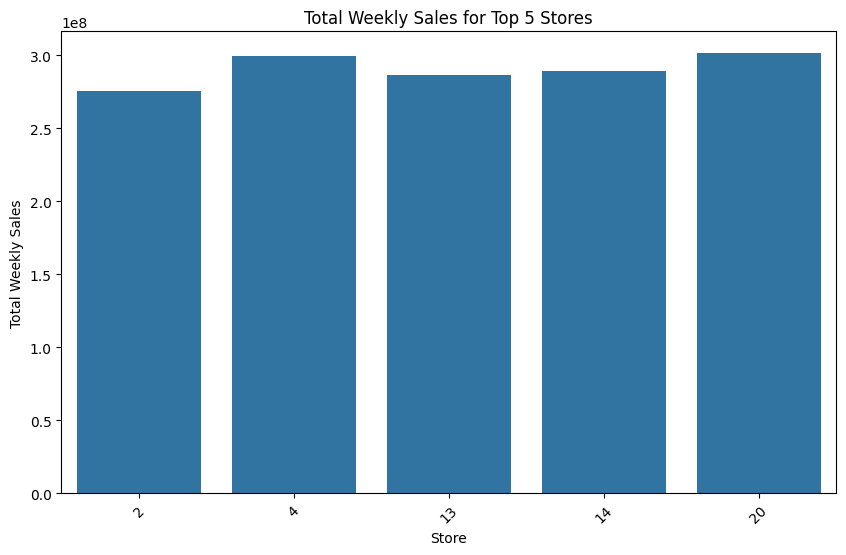

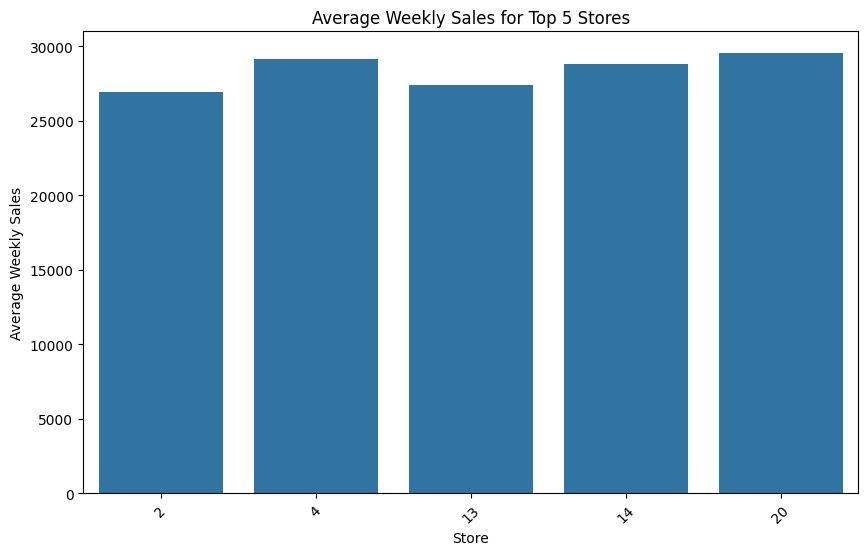

In [22]:
store_sales = df_final.groupby("Store")["Weekly_Sales"].sum()
store_avg_sales = df_final.groupby("Store")["Weekly_Sales"].mean()

top_5_total_sales = store_sales.sort_values(ascending=False).head(5)
top_5_avg_sales = store_avg_sales.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_total_sales.index, y=top_5_total_sales.values)
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.title("Total Weekly Sales for Top 5 Stores")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_avg_sales.index, y=top_5_avg_sales.values)
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales for Top 5 Stores")
plt.xticks(rotation=45)
plt.show()

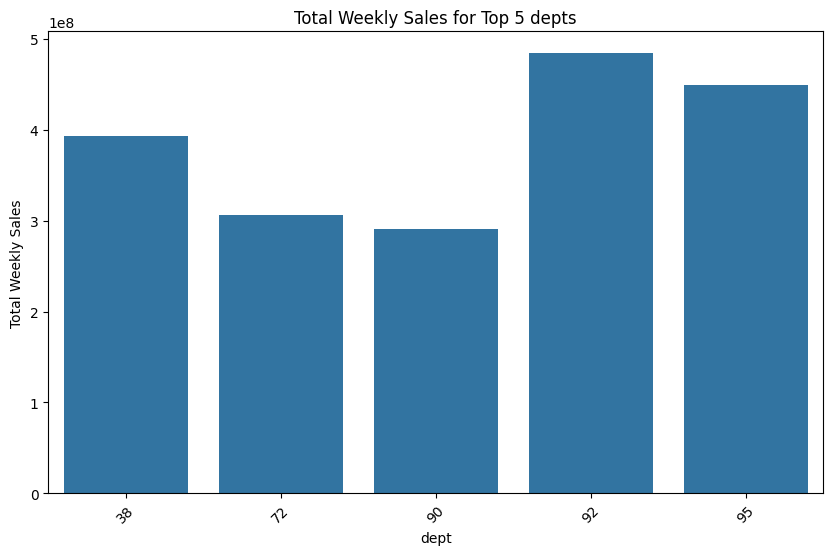

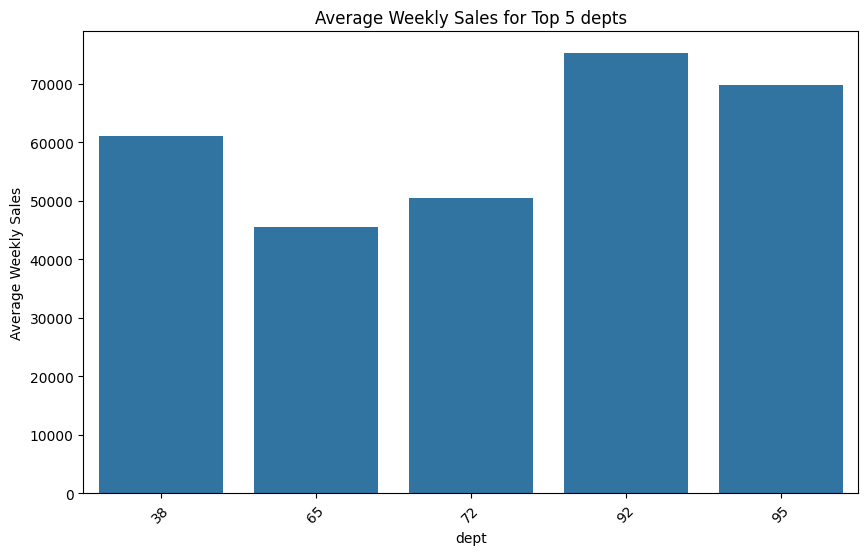

In [23]:
dept_sales = df_final.groupby("Dept")["Weekly_Sales"].sum()
dept_avg_sales = df_final.groupby("Dept")["Weekly_Sales"].mean()

top_5_total_sales = dept_sales.sort_values(ascending=False).head(5)
top_5_avg_sales = dept_avg_sales.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_total_sales.index, y=top_5_total_sales.values)
plt.xlabel("dept")
plt.ylabel("Total Weekly Sales")
plt.title("Total Weekly Sales for Top 5 depts")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_avg_sales.index, y=top_5_avg_sales.values)
plt.xlabel("dept")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales for Top 5 depts")
plt.xticks(rotation=45)
plt.show()

In [14]:
total_sales = df_final['Weekly_Sales'].sum()
avg_sales_per_week = df_final['Weekly_Sales'].mean()
holiday_sales_avg = df_final[df_final['IsHoliday']]['Weekly_Sales'].mean()
non_holiday_sales_avg = df_final[~df_final['IsHoliday']]['Weekly_Sales'].mean()

def calc_mean(values):
    return values.mean() if len(values.dropna()) > 0 else 0
markdowns_effect = df_final.groupby(['IsHoliday']).agg({
    'MarkDown1': calc_mean,
    'MarkDown2': calc_mean,
    'MarkDown3': calc_mean,
    'MarkDown4': calc_mean,
    'MarkDown5': calc_mean,
    'Weekly_Sales': 'mean'
})
summary = {
    "total_sales": total_sales,
    "avg_sales_per_week": avg_sales_per_week,
    "holiday_sales_avg": holiday_sales_avg,
    "non_holiday_sales_avg": non_holiday_sales_avg,
    "markdowns_effect": markdowns_effect
}

total_sales:
6737218987.110001

avg_sales_per_week:
15981.258123467042

holiday_sales_avg:
17035.823187350394

non_holiday_sales_avg:
15901.445069008367

markdowns_effect:
             MarkDown1     MarkDown2     MarkDown3    MarkDown4    MarkDown5  \
IsHoliday                                                                      
False      7332.984933   2298.528959    195.831724  3384.219730  4722.908034   
True       6240.733956  13048.763547  15077.548736  3371.283148  3536.647067   

           Weekly_Sales  
IsHoliday                
False      15901.445069  
True       17035.823187  



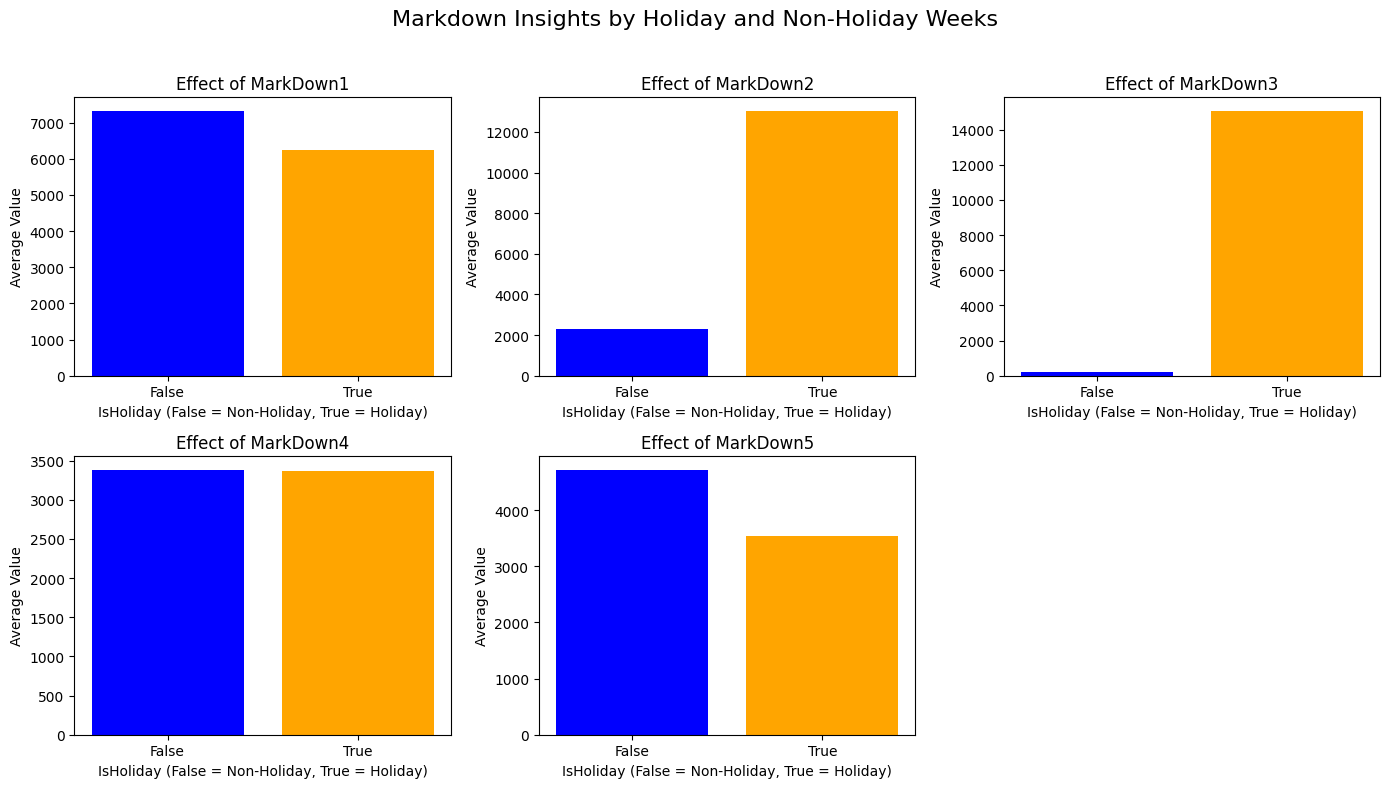

In [15]:

markdowns_effect = markdowns_effect.reset_index()
plt.figure(figsize=(14, 8))
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for i, column in enumerate(markdown_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of plots
    plt.bar(markdowns_effect['IsHoliday'].astype(str), markdowns_effect[column], color=['blue', 'orange'])
    plt.title(f'Effect of {column}')
    plt.ylabel('Average Value')
    plt.xlabel('IsHoliday (False = Non-Holiday, True = Holiday)')
plt.suptitle('Markdown Insights by Holiday and Non-Holiday Weeks', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

holiday_data = df_final[df_final['IsHoliday']]

features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Store', 'Dept', 'Size', '']
X = holiday_data[features].fillna(0) 
y = holiday_data['Weekly_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", importance)


RMSE: 15492.734884038662
Feature Importance:
 Dept         0.539421
Store        0.287466
MarkDown3    0.113786
MarkDown5    0.020593
MarkDown1    0.014096
MarkDown2    0.012877
MarkDown4    0.011761
dtype: float64


Mean Squared Error (MSE): 240024834.19
Mean Absolute Error (MAE): 4520.94
R-squared (R2): 0.73


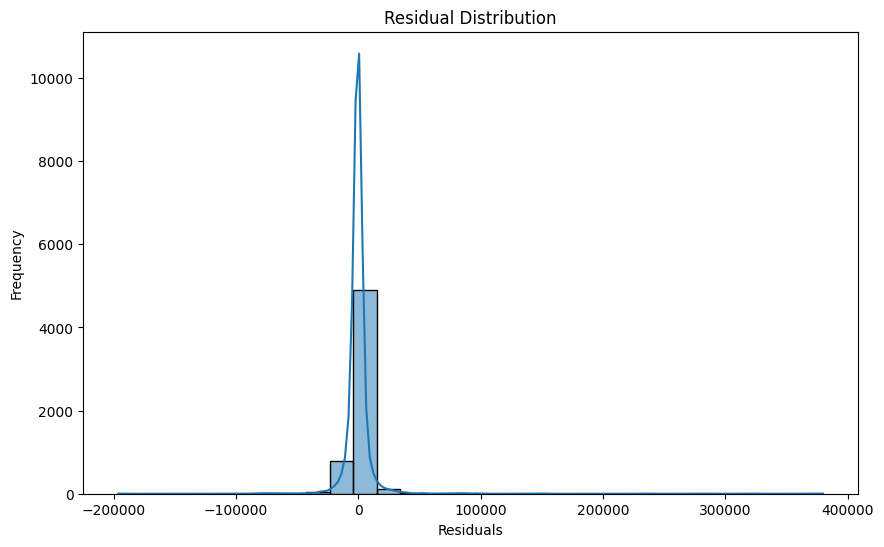

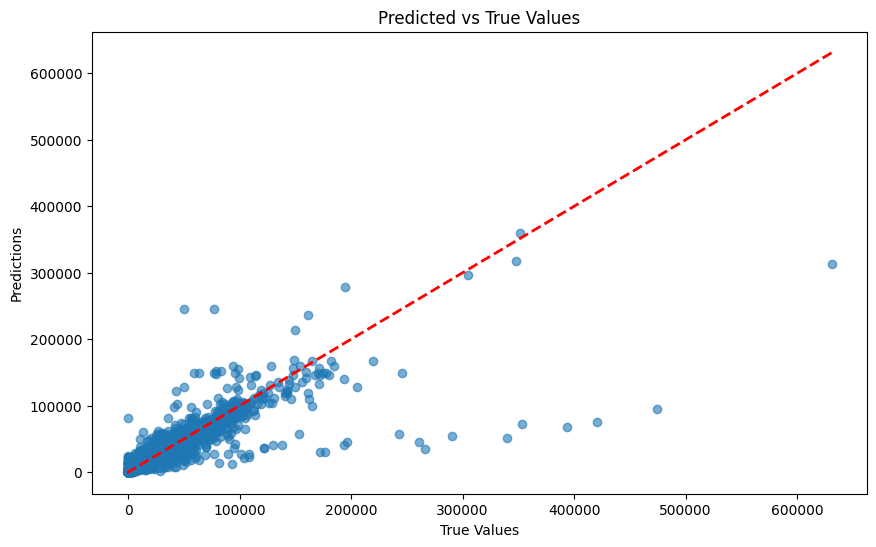

In [18]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
